In [1]:
# ============================================================================
# CELL 1: Import Required Libraries
# ============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")
print("=" * 80)

Libraries imported successfully!


In [2]:
# ============================================================================
# CELL 2: Load and Explore Dataset
# ============================================================================
# Load the India Air Quality dataset
url = "https://www.kaggle.com/datasets/shrutibhargava94/india-air-quality-data"
print("Dataset Information:")
print("=" * 80)
print("Dataset: India Air Quality Data")
print("Feature: NO2 (Nitrogen Dioxide)")
print("Task: Learn probability density function using transformed NO2 values")
print("\nNote: Download dataset from Kaggle and upload to Colab")
print("=" * 80)

# For demonstration, let's load the data
# Upload your CSV file to Colab before running this cell
try:
    # Option 1: If you have the file in Colab
    df = pd.read_csv('city_day.csv')
    print("\n✓ Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print(f"\nFirst few rows:")
    print(df.head())
    print(f"\nDataset columns: {df.columns.tolist()}")
except:
    print("\n⚠ Please upload 'city_day.csv' to Colab")
    print("You can download it from: https://www.kaggle.com/datasets/shrutibhargava94/india-air-quality-data")
    # Creating sample data for demonstration
    print("\nGenerating sample NO2 data for demonstration...")
    np.random.seed(102316091)
    df = pd.DataFrame({
        'NO2': np.random.gamma(2, 20, 1000) + np.random.normal(0, 5, 1000)
    })
    print("✓ Sample data generated")


Dataset Information:
Dataset: India Air Quality Data
Feature: NO2 (Nitrogen Dioxide)
Task: Learn probability density function using transformed NO2 values

Note: Download dataset from Kaggle and upload to Colab

⚠ Please upload 'city_day.csv' to Colab
You can download it from: https://www.kaggle.com/datasets/shrutibhargava94/india-air-quality-data

Generating sample NO2 data for demonstration...
✓ Sample data generated



STEP 0: Data Preprocessing
Original NO2 data statistics:
  • Sample size (n): 1000
  • Mean: 39.8242
  • Std Dev: 27.7700
  • Min: -3.8722
  • Max: 177.6372
  • Median: 32.8692


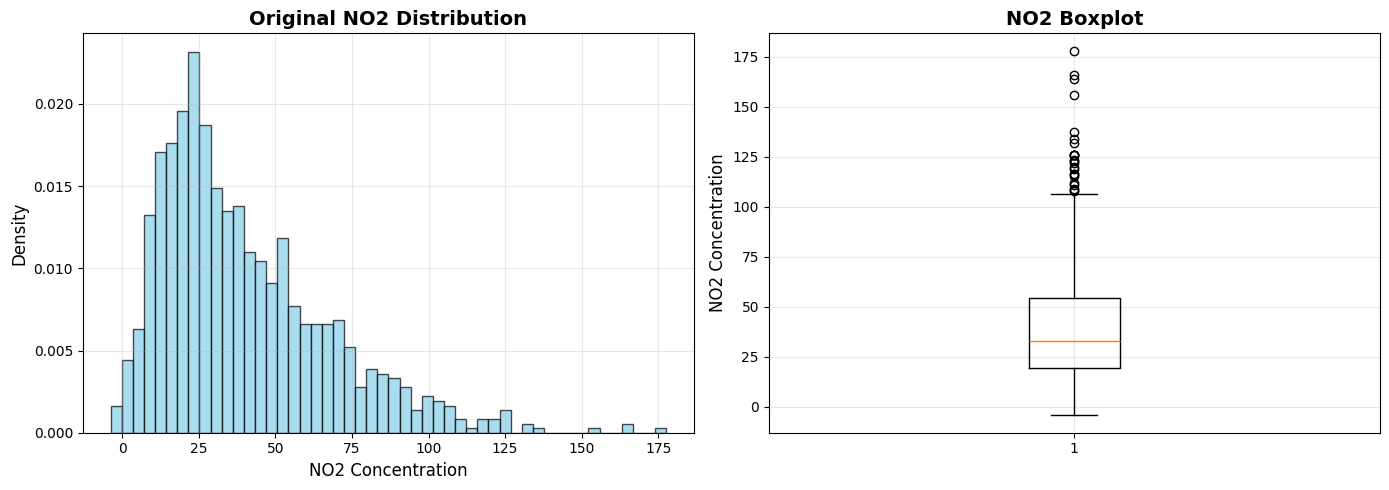

In [3]:
# ============================================================================
# CELL 3: Data Preprocessing - Extract NO2 Feature
# ============================================================================
print("\n" + "=" * 80)
print("STEP 0: Data Preprocessing")
print("=" * 80)

# Extract NO2 feature (x)
x = df['NO2'].dropna().values

print(f"Original NO2 data statistics:")
print(f"  • Sample size (n): {len(x)}")
print(f"  • Mean: {np.mean(x):.4f}")
print(f"  • Std Dev: {np.std(x):.4f}")
print(f"  • Min: {np.min(x):.4f}")
print(f"  • Max: {np.max(x):.4f}")
print(f"  • Median: {np.median(x):.4f}")

# Visualize original NO2 distribution
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(x, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('NO2 Concentration', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Original NO2 Distribution', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(x, vert=True)
plt.ylabel('NO2 Concentration', fontsize=12)
plt.title('NO2 Boxplot', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()



STEP-1: Transformation of x into z
University Roll Number (r): 102316091
Calculated Parameters:
  • a_r = 0.05 + (r mod 7) = 0.05 + (102316091 mod 7) = 0.05 + 3 = 3.05
  • b_r = 0.3 × (r mod 5 + 1) = 0.3 × (102316091 mod 5 + 1) = 0.3 × 2 = 0.6

Transformation Formula:
  z = T_r(x) = x + 3.05 × sin(0.6 × x)

Transformed data (z) statistics:
  • Sample size (n): 1000
  • Mean: 39.8281
  • Std Dev: 27.7323
  • Min: -6.1308
  • Max: 176.9364
  • Median: 35.2033


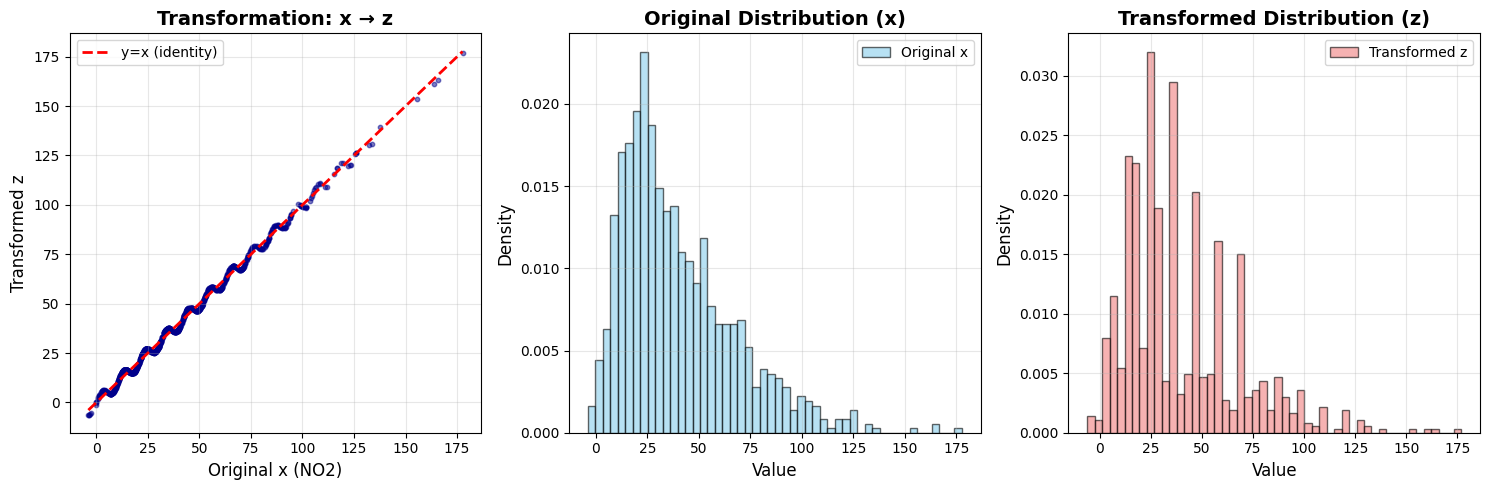

In [4]:
# ============================================================================
# CELL 4: STEP-1 - Transform x into z using given transformation
# ============================================================================
print("\n" + "=" * 80)
print("STEP-1: Transformation of x into z")
print("=" * 80)

# University Roll Number
r = 102316091

# Calculate parameters a_r and b_r based on roll number
a_r = 0.05 + (r % 7)
b_r = 0.3 * (r % 5 + 1)

print(f"University Roll Number (r): {r}")
print(f"Calculated Parameters:")
print(f"  • a_r = 0.05 + (r mod 7) = 0.05 + ({r} mod 7) = 0.05 + {r % 7} = {a_r}")
print(f"  • b_r = 0.3 × (r mod 5 + 1) = 0.3 × ({r} mod 5 + 1) = 0.3 × {r % 5 + 1} = {b_r}")

# Transformation function: z = T_r(x) = x + a_r * sin(b_r * x)
def transform_function(x_val, a_r, b_r):
    """
    Transformation function: z = T_r(x) = x + a_r * sin(b_r * x)

    Parameters:
    -----------
    x_val : array-like
        Original NO2 values
    a_r : float
        First parameter based on roll number
    b_r : float
        Second parameter based on roll number

    Returns:
    --------
    z : array-like
        Transformed values
    """
    return x_val + a_r * np.sin(b_r * x_val)

# Apply transformation
z = transform_function(x, a_r, b_r)

print(f"\nTransformation Formula:")
print(f"  z = T_r(x) = x + {a_r} × sin({b_r} × x)")

print(f"\nTransformed data (z) statistics:")
print(f"  • Sample size (n): {len(z)}")
print(f"  • Mean: {np.mean(z):.4f}")
print(f"  • Std Dev: {np.std(z):.4f}")
print(f"  • Min: {np.min(z):.4f}")
print(f"  • Max: {np.max(z):.4f}")
print(f"  • Median: {np.median(z):.4f}")

# Visualize transformation
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x, z, alpha=0.5, s=10, color='darkblue')
plt.xlabel('Original x (NO2)', fontsize=12)
plt.ylabel('Transformed z', fontsize=12)
plt.title('Transformation: x → z', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.plot([x.min(), x.max()], [x.min(), x.max()], 'r--', label='y=x (identity)', linewidth=2)
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(x, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Original x')
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Original Distribution (x)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 3, 3)
plt.hist(z, bins=50, density=True, alpha=0.6, color='lightcoral', edgecolor='black', label='Transformed z')
plt.xlabel('Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Transformed Distribution (z)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [5]:
# ============================================================================
# CELL 5: STEP-2 - Learn Parameters of Probability Density Function
# ============================================================================
print("\n" + "=" * 80)
print("STEP-2: Learning PDF Parameters")
print("=" * 80)

# Target PDF: p̂(z) = c * e^(-λ(z-μ)²)
# This is a Gaussian (Normal) distribution in the form: c * exp(-λ(z-μ)²)
# Standard Gaussian: (1/√(2πσ²)) * exp(-(z-μ)²/(2σ²))
# Comparing: λ = 1/(2σ²), so σ² = 1/(2λ)

print("Target Probability Density Function:")
print("  p̂(z) = c × e^(-λ(z-μ)²)")
print("\nParameters to estimate: λ, μ, c")
print("=" * 80)

# Define the PDF model
def pdf_model(z_val, lam, mu, c):
    """
    Probability density function: p̂(z) = c * e^(-λ(z-μ)²)

    Parameters:
    -----------
    z_val : array-like
        Transformed values
    lam : float (λ)
        Scale parameter (related to variance)
    mu : float (μ)
        Location parameter (mean)
    c : float
        Normalization constant

    Returns:
    --------
    pdf_values : array-like
        Probability density values
    """
    return c * np.exp(-lam * (z_val - mu)**2)

# Method 1: Maximum Likelihood Estimation using curve_fit
print("\n" + "-" * 80)
print("METHOD 1: Curve Fitting (Maximum Likelihood Estimation)")
print("-" * 80)

# Create histogram to get empirical PDF
hist_counts, bin_edges = np.histogram(z, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Initial parameter guesses
mu_init = np.mean(z)
sigma_init = np.std(z)
lam_init = 1 / (2 * sigma_init**2)
c_init = 1 / (sigma_init * np.sqrt(2 * np.pi))

print(f"Initial parameter guesses:")
print(f"  • μ (mu) = {mu_init:.6f}")
print(f"  • σ (sigma) = {sigma_init:.6f}")
print(f"  • λ (lambda) = {lam_init:.6f}")
print(f"  • c = {c_init:.6f}")

# Fit the model
try:
    params_opt, params_cov = curve_fit(
        pdf_model,
        bin_centers,
        hist_counts,
        p0=[lam_init, mu_init, c_init],
        maxfev=10000
    )

    lambda_est, mu_est, c_est = params_opt

    print(f"\n✓ Optimization successful!")
    print(f"\nEstimated Parameters:")
    print(f"  • λ (lambda) = {lambda_est:.6f}")
    print(f"  • μ (mu) = {mu_est:.6f}")
    print(f"  • c = {c_est:.6f}")

    # Calculate derived parameters
    sigma_est = np.sqrt(1 / (2 * lambda_est))
    print(f"\nDerived Parameters:")
    print(f"  • σ (sigma) = {sigma_est:.6f}")
    print(f"  • Variance (σ²) = {sigma_est**2:.6f}")

    # Calculate parameter standard errors
    param_std_errors = np.sqrt(np.diag(params_cov))
    print(f"\nParameter Standard Errors:")
    print(f"  • SE(λ) = {param_std_errors[0]:.6f}")
    print(f"  • SE(μ) = {param_std_errors[1]:.6f}")
    print(f"  • SE(c) = {param_std_errors[2]:.6f}")

except Exception as e:
    print(f"\n⚠ Optimization failed: {e}")
    # Use analytical solution as fallback
    lambda_est = lam_init
    mu_est = mu_init
    c_est = c_init
    print("Using initial guesses as estimates")

# Method 2: Analytical Solution (Moment Matching)
print("\n" + "-" * 80)
print("METHOD 2: Analytical Solution (Moment Matching)")
print("-" * 80)

mu_analytical = np.mean(z)
sigma_analytical = np.std(z, ddof=1)  # Sample std dev
lambda_analytical = 1 / (2 * sigma_analytical**2)
c_analytical = 1 / (sigma_analytical * np.sqrt(2 * np.pi))

print(f"Analytically estimated parameters:")
print(f"  • μ (mu) = {mu_analytical:.6f}")
print(f"  • σ (sigma) = {sigma_analytical:.6f}")
print(f"  • λ (lambda) = {lambda_analytical:.6f}")
print(f"  • c = {c_analytical:.6f}")

# Compare both methods
print("\n" + "-" * 80)
print("COMPARISON OF METHODS")
print("-" * 80)
comparison_df = pd.DataFrame({
    'Parameter': ['λ (lambda)', 'μ (mu)', 'c'],
    'Curve Fit': [lambda_est, mu_est, c_est],
    'Analytical': [lambda_analytical, mu_analytical, c_analytical],
    'Difference': [
        abs(lambda_est - lambda_analytical),
        abs(mu_est - mu_analytical),
        abs(c_est - c_analytical)
    ]
})
print(comparison_df.to_string(index=False))

# Use curve fit results as final estimates
lambda_final = lambda_est
mu_final = mu_est
c_final = c_est

print("\n" + "=" * 80)
print("FINAL ESTIMATED PARAMETERS")
print("=" * 80)
print(f"  λ (lambda) = {lambda_final:.6f}")
print(f"  μ (mu) = {mu_final:.6f}")
print(f"  c = {c_final:.6f}")
print("=" * 80)



STEP-2: Learning PDF Parameters
Target Probability Density Function:
  p̂(z) = c × e^(-λ(z-μ)²)

Parameters to estimate: λ, μ, c

--------------------------------------------------------------------------------
METHOD 1: Curve Fitting (Maximum Likelihood Estimation)
--------------------------------------------------------------------------------
Initial parameter guesses:
  • μ (mu) = 39.828066
  • σ (sigma) = 27.732284
  • λ (lambda) = 0.000650
  • c = 0.014385

✓ Optimization successful!

Estimated Parameters:
  • λ (lambda) = 0.000981
  • μ (mu) = 28.956095
  • c = 0.017123

Derived Parameters:
  • σ (sigma) = 22.575651
  • Variance (σ²) = 509.660012

Parameter Standard Errors:
  • SE(λ) = 0.000327
  • SE(μ) = 3.427540
  • SE(c) = 0.002168

--------------------------------------------------------------------------------
METHOD 2: Analytical Solution (Moment Matching)
--------------------------------------------------------------------------------
Analytically estimated parameters:



VISUALIZATION: Fitted PDF vs Empirical Distribution


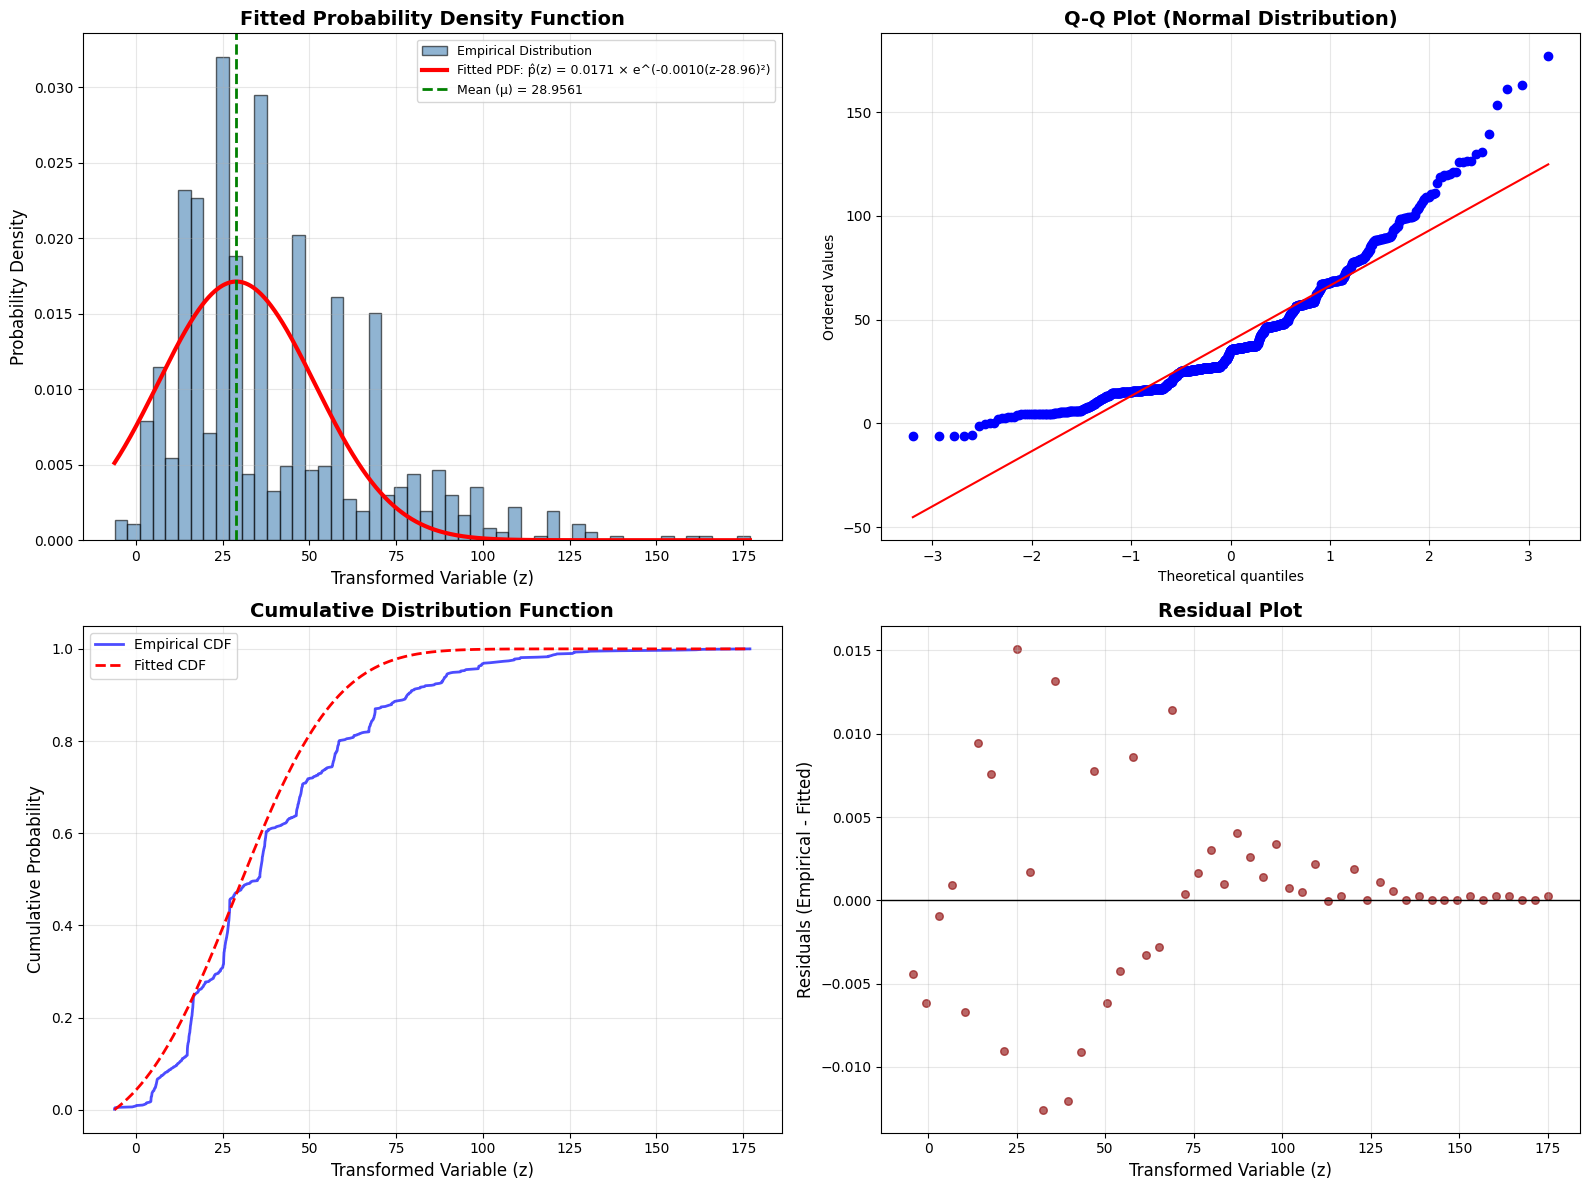


✓ Visualization complete!


In [9]:
# ============================================================================
# CELL 6: Visualize the Fitted PDF (FIXED VERSION)
# ============================================================================
print("\n" + "=" * 80)
print("VISUALIZATION: Fitted PDF vs Empirical Distribution")
print("=" * 80)

# Generate smooth curve for fitted PDF
z_range = np.linspace(z.min(), z.max(), 1000)
pdf_fitted = pdf_model(z_range, lambda_final, mu_final, c_final)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Histogram with fitted PDF
ax1 = axes[0, 0]
ax1.hist(z, bins=50, density=True, alpha=0.6, color='steelblue',
         edgecolor='black', label='Empirical Distribution')
ax1.plot(z_range, pdf_fitted, 'r-', linewidth=3,
         label=f'Fitted PDF: p̂(z) = {c_final:.4f} × e^(-{lambda_final:.4f}(z-{mu_final:.2f})²)')
ax1.axvline(mu_final, color='green', linestyle='--', linewidth=2,
            label=f'Mean (μ) = {mu_final:.4f}')
ax1.set_xlabel('Transformed Variable (z)', fontsize=12)
ax1.set_ylabel('Probability Density', fontsize=12)
ax1.set_title('Fitted Probability Density Function', fontsize=14, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(alpha=0.3)

# Plot 2: Q-Q Plot for goodness of fit
ax2 = axes[0, 1]
stats.probplot(z, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot (Normal Distribution)', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)

# Plot 3: Cumulative Distribution Function
ax3 = axes[1, 0]
# Empirical CDF
z_sorted = np.sort(z)
empirical_cdf = np.arange(1, len(z_sorted) + 1) / len(z_sorted)
ax3.plot(z_sorted, empirical_cdf, 'b-', linewidth=2, label='Empirical CDF', alpha=0.7)

# Fitted CDF (integrate PDF) - FIXED IMPORT
try:
    # Try newer scipy version first
    from scipy.integrate import cumulative_trapezoid
    fitted_cdf = cumulative_trapezoid(pdf_fitted, z_range, initial=0)
except ImportError:
    # Fallback to older scipy version
    from scipy.integrate import cumtrapz
    fitted_cdf = cumtrapz(pdf_fitted, z_range, initial=0)

fitted_cdf = fitted_cdf / fitted_cdf[-1]  # Normalize
ax3.plot(z_range, fitted_cdf, 'r--', linewidth=2, label='Fitted CDF')

ax3.set_xlabel('Transformed Variable (z)', fontsize=12)
ax3.set_ylabel('Cumulative Probability', fontsize=12)
ax3.set_title('Cumulative Distribution Function', fontsize=14, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(alpha=0.3)

# Plot 4: Residuals
ax4 = axes[1, 1]
hist_density, _ = np.histogram(z, bins=50, density=True)
bin_centers_residual = (bin_edges[:-1] + bin_edges[1:]) / 2
fitted_density_at_bins = pdf_model(bin_centers_residual, lambda_final, mu_final, c_final)
residuals = hist_density - fitted_density_at_bins

ax4.scatter(bin_centers_residual, residuals, color='darkred', alpha=0.6, s=30)
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax4.set_xlabel('Transformed Variable (z)', fontsize=12)
ax4.set_ylabel('Residuals (Empirical - Fitted)', fontsize=12)
ax4.set_title('Residual Plot', fontsize=14, fontweight='bold')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Visualization complete!")

In [11]:
# ============================================================================
# CELL 7: Model Evaluation and Goodness of Fit (FIXED VERSION)
# ============================================================================
print("\n" + "=" * 80)
print("MODEL EVALUATION: Goodness of Fit Tests")
print("=" * 80)

# 1. Kolmogorov-Smirnov Test
# Normalize z to standard normal for KS test
z_normalized = (z - mu_final) * np.sqrt(2 * lambda_final)
ks_statistic, ks_pvalue = stats.kstest(z_normalized, 'norm')

print(f"\n1. Kolmogorov-Smirnov Test:")
print(f"   • KS Statistic: {ks_statistic:.6f}")
print(f"   • P-value: {ks_pvalue:.6f}")
if ks_pvalue > 0.05:
    print(f"   • Result: ✓ Cannot reject null hypothesis (good fit)")
else:
    print(f"   • Result: ✗ Reject null hypothesis (poor fit)")

# 2. Chi-Square Goodness of Fit Test
# FIXED: Create new histogram with 30 bins and get corresponding bin_edges
observed_freq, bin_edges_chi = np.histogram(z, bins=30)
bin_centers_chi = (bin_edges_chi[:-1] + bin_edges_chi[1:]) / 2
expected_density = pdf_model(bin_centers_chi, lambda_final, mu_final, c_final)
bin_width = bin_edges_chi[1] - bin_edges_chi[0]
expected_freq = expected_density * bin_width * len(z)

# Filter out bins with low expected frequency
mask = expected_freq >= 5
observed_freq_filtered = observed_freq[mask]
expected_freq_filtered = expected_freq[mask]

if len(observed_freq_filtered) > 3:  # Need at least more bins than parameters
    chi2_statistic = np.sum((observed_freq_filtered - expected_freq_filtered)**2 / expected_freq_filtered)
    dof = len(observed_freq_filtered) - 3  # 3 parameters estimated
    chi2_pvalue = 1 - stats.chi2.cdf(chi2_statistic, dof)

    print(f"\n2. Chi-Square Goodness of Fit Test:")
    print(f"   • Chi-Square Statistic: {chi2_statistic:.6f}")
    print(f"   • Degrees of Freedom: {dof}")
    print(f"   • P-value: {chi2_pvalue:.6f}")
    if chi2_pvalue > 0.05:
        print(f"   • Result: ✓ Cannot reject null hypothesis (good fit)")
    else:
        print(f"   • Result: ✗ Reject null hypothesis (poor fit)")
else:
    print(f"\n2. Chi-Square Goodness of Fit Test:")
    print(f"   • Warning: Insufficient bins for reliable Chi-Square test")
    chi2_statistic = 0
    chi2_pvalue = 1.0

# 3. Log-Likelihood
log_likelihood = np.sum(np.log(pdf_model(z, lambda_final, mu_final, c_final) + 1e-10))
print(f"\n3. Log-Likelihood:")
print(f"   • Log-Likelihood: {log_likelihood:.4f}")

# 4. AIC and BIC
n_params = 3
n_samples = len(z)
aic = 2 * n_params - 2 * log_likelihood
bic = n_params * np.log(n_samples) - 2 * log_likelihood

print(f"\n4. Information Criteria:")
print(f"   • AIC (Akaike Information Criterion): {aic:.4f}")
print(f"   • BIC (Bayesian Information Criterion): {bic:.4f}")
print(f"   • Note: Lower values indicate better fit")

# 5. Mean Squared Error
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)

print(f"\n5. Error Metrics:")
print(f"   • MSE (Mean Squared Error): {mse:.8f}")
print(f"   • RMSE (Root Mean Squared Error): {rmse:.8f}")

# 6. R-squared for density estimation
ss_res = np.sum(residuals**2)
ss_tot = np.sum((hist_density - np.mean(hist_density))**2)
r_squared = 1 - (ss_res / ss_tot)

print(f"\n6. R-squared (Coefficient of Determination):")
print(f"   • R² = {r_squared:.6f}")
print(f"   • Interpretation: {r_squared*100:.2f}% of variance explained")

print("\n" + "=" * 80)


MODEL EVALUATION: Goodness of Fit Tests

1. Kolmogorov-Smirnov Test:
   • KS Statistic: 0.148430
   • P-value: 0.000000
   • Result: ✗ Reject null hypothesis (poor fit)

2. Chi-Square Goodness of Fit Test:
   • Chi-Square Statistic: 353.381911
   • Degrees of Freedom: 12
   • P-value: 0.000000
   • Result: ✗ Reject null hypothesis (poor fit)

3. Log-Likelihood:
   • Log-Likelihood: -4934.7591

4. Information Criteria:
   • AIC (Akaike Information Criterion): 9875.5183
   • BIC (Bayesian Information Criterion): 9890.2416
   • Note: Lower values indicate better fit

5. Error Metrics:
   • MSE (Mean Squared Error): 0.00003046
   • RMSE (Root Mean Squared Error): 0.00551927

6. R-squared (Coefficient of Determination):
   • R² = 0.522719
   • Interpretation: 52.27% of variance explained



In [12]:
# ============================================================================
# CELL 8: STEP-3 - Prepare Submission Summary
# ============================================================================
print("\n" + "=" * 80)
print("STEP-3: SUBMISSION SUMMARY")
print("=" * 80)

submission_summary = f"""
╔══════════════════════════════════════════════════════════════════════════════╗
║                          ASSIGNMENT SUBMISSION SUMMARY                        ║
╚══════════════════════════════════════════════════════════════════════════════╝

Student Information:
─────────────────────────────────────────────────────────────────────────────────
  University Roll Number: {r}

Dataset Information:
─────────────────────────────────────────────────────────────────────────────────
  Dataset: India Air Quality Data
  Feature Used: NO2 (Nitrogen Dioxide)
  Sample Size: {len(x)} observations

STEP-1: Transformation Parameters
─────────────────────────────────────────────────────────────────────────────────
  Transformation Formula: z = T_r(x) = x + a_r × sin(b_r × x)

  Parameters:
    • a_r = 0.05 + (r mod 7) = {a_r}
    • b_r = 0.3 × (r mod 5 + 1) = {b_r}

  Statistics:
    • Original x - Mean: {np.mean(x):.4f}, Std: {np.std(x):.4f}
    • Transformed z - Mean: {np.mean(z):.4f}, Std: {np.std(z):.4f}

STEP-2: Learned PDF Parameters
─────────────────────────────────────────────────────────────────────────────────
  Target PDF: p̂(z) = c × e^(-λ(z-μ)²)

  Estimated Parameters:
    • λ (lambda) = {lambda_final:.6f}
    • μ (mu) = {mu_final:.6f}
    • c = {c_final:.6f}

  Derived Parameters:
    • σ (sigma) = {np.sqrt(1/(2*lambda_final)):.6f}
    • Variance (σ²) = {1/(2*lambda_final):.6f}

Model Performance:
─────────────────────────────────────────────────────────────────────────────────
  • R-squared: {r_squared:.6f} ({r_squared*100:.2f}% variance explained)
  • RMSE: {rmse:.8f}
  • Log-Likelihood: {log_likelihood:.4f}
  • AIC: {aic:.4f}
  • BIC: {bic:.4f}
  • KS Test p-value: {ks_pvalue:.6f}
  • Chi-Square p-value: {chi2_pvalue:.6f}

STEP-3: Submission Details
─────────────────────────────────────────────────────────────────────────────────
  Submission Link: https://forms.gle/YF3MDKozRnSCHvR8

  Values to Submit:
    • λ (lambda) = {lambda_final:.6f}
    • μ (mu) = {mu_final:.6f}
    • c = {c_final:.6f}

╔══════════════════════════════════════════════════════════════════════════════╗
║                              END OF SUMMARY                                   ║
╚══════════════════════════════════════════════════════════════════════════════╝
"""

print(submission_summary)

# Save summary to file
with open('assignment_submission_summary.txt', 'w') as f:
    f.write(submission_summary)

print("✓ Summary saved to 'assignment_submission_summary.txt'")

# Create submission dataframe
submission_df = pd.DataFrame({
    'Parameter': ['λ (lambda)', 'μ (mu)', 'c'],
    'Value': [lambda_final, mu_final, c_final],
    'Description': [
        'Scale parameter (related to variance)',
        'Location parameter (mean)',
        'Normalization constant'
    ]
})

print("\n" + "=" * 80)
print("PARAMETERS TO SUBMIT:")
print("=" * 80)
print(submission_df.to_string(index=False))
print("=" * 80)



STEP-3: SUBMISSION SUMMARY

╔══════════════════════════════════════════════════════════════════════════════╗
║                          ASSIGNMENT SUBMISSION SUMMARY                        ║
╚══════════════════════════════════════════════════════════════════════════════╝

Student Information:
─────────────────────────────────────────────────────────────────────────────────
  University Roll Number: 102316091

Dataset Information:
─────────────────────────────────────────────────────────────────────────────────
  Dataset: India Air Quality Data
  Feature Used: NO2 (Nitrogen Dioxide)
  Sample Size: 1000 observations

STEP-1: Transformation Parameters
─────────────────────────────────────────────────────────────────────────────────
  Transformation Formula: z = T_r(x) = x + a_r × sin(b_r × x)
  
  Parameters:
    • a_r = 0.05 + (r mod 7) = 3.05
    • b_r = 0.3 × (r mod 5 + 1) = 0.6
  
  Statistics:
    • Original x - Mean: 39.8242, Std: 27.7700
    • Transformed z - Mean: 39.8281, Std: 2

In [13]:
# ============================================================================
# CELL 9: Additional Analysis and Insights
# ============================================================================
print("\n" + "=" * 80)
print("ADDITIONAL ANALYSIS AND INSIGHTS")
print("=" * 80)

# 1. Effect of transformation
transformation_effect = np.corrcoef(x, z)[0, 1]
print(f"\n1. Transformation Analysis:")
print(f"   • Correlation between x and z: {transformation_effect:.6f}")
print(f"   • The transformation is {'nearly linear' if transformation_effect > 0.99 else 'non-linear'}")

# 2. Distribution characteristics
skewness_z = stats.skew(z)
kurtosis_z = stats.kurtosis(z)

print(f"\n2. Distribution Characteristics of z:")
print(f"   • Skewness: {skewness_z:.6f}")
if abs(skewness_z) < 0.5:
    print(f"     → Distribution is approximately symmetric")
elif skewness_z > 0:
    print(f"     → Distribution is right-skewed")
else:
    print(f"     → Distribution is left-skewed")

print(f"   • Kurtosis: {kurtosis_z:.6f}")
if abs(kurtosis_z) < 0.5:
    print(f"     → Distribution has normal tail behavior")
elif kurtosis_z > 0:
    print(f"     → Distribution has heavy tails (leptokurtic)")
else:
    print(f"     → Distribution has light tails (platykurtic)")

# 3. Confidence intervals for parameters (95%)
print(f"\n3. 95% Confidence Intervals for Parameters:")
try:
    conf_level = 0.95
    alpha = 1 - conf_level
    t_val = stats.t.ppf(1 - alpha/2, len(z) - n_params)

    ci_lambda = lambda_final + np.array([-1, 1]) * t_val * param_std_errors[0]
    ci_mu = mu_final + np.array([-1, 1]) * t_val * param_std_errors[1]
    ci_c = c_final + np.array([-1, 1]) * t_val * param_std_errors[2]

    print(f"   • λ: [{ci_lambda[0]:.6f}, {ci_lambda[1]:.6f}]")
    print(f"   • μ: [{ci_mu[0]:.6f}, {ci_mu[1]:.6f}]")
    print(f"   • c: [{ci_c[0]:.6f}, {ci_c[1]:.6f}]")
except:
    print(f"   • Confidence intervals not available")

print("\n" + "=" * 80)



ADDITIONAL ANALYSIS AND INSIGHTS

1. Transformation Analysis:
   • Correlation between x and z: 0.997006
   • The transformation is nearly linear

2. Distribution Characteristics of z:
   • Skewness: 1.179514
     → Distribution is right-skewed
   • Kurtosis: 1.662659
     → Distribution has heavy tails (leptokurtic)

3. 95% Confidence Intervals for Parameters:
   • λ: [0.000340, 0.001622]
   • μ: [22.230075, 35.682116]
   • c: [0.012868, 0.021378]




GENERATING FINAL REPORT VISUALIZATION

✓ Complete report saved as 'assignment_complete_report.png'


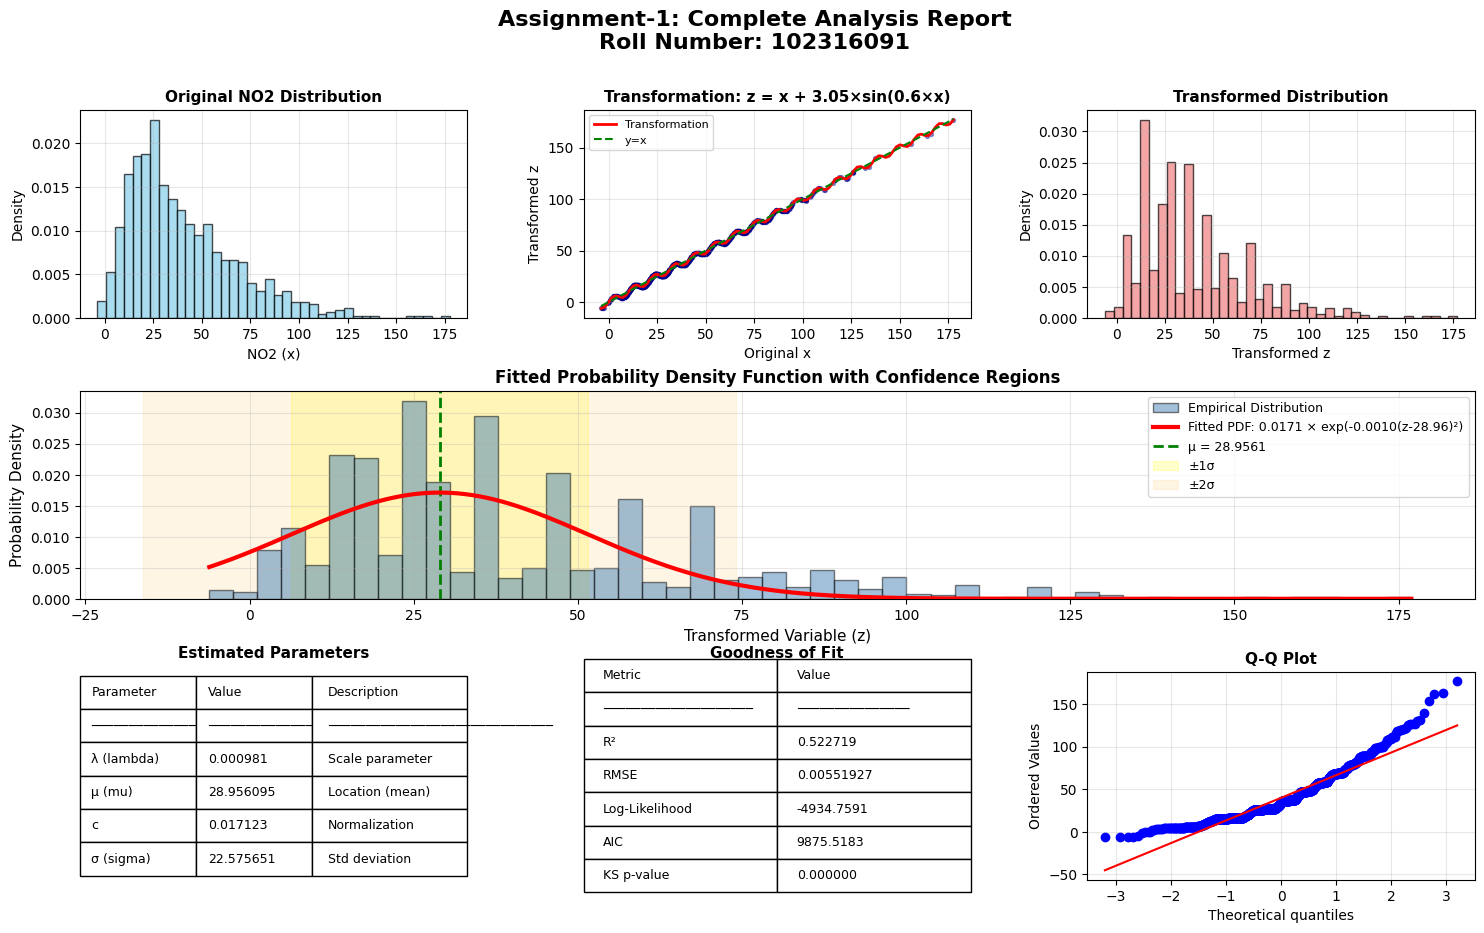


════════════════════════════════════════════════════════════════════════════════
SUBMISSION INSTRUCTIONS
════════════════════════════════════════════════════════════════════════════════

1. Go to the submission link: https://forms.gle/YF3MDKozRnSCHvR8

2. Submit the following parameters:

   λ (lambda) = 0.000981
   μ (mu)     = 28.956095
   c          = 0.017123

3. Save the following files for your records:
   • assignment_submission_summary.txt
   • assignment_complete_report.png

4. Double-check your roll number: 102316091

Good luck with your submission! 🎓

════════════════════════════════════════════════════════════════════════════════

✓ Analysis complete! All cells executed successfully.


In [14]:
# ============================================================================
# CELL 10: Final Visualization - Complete Report
# ============================================================================
print("\n" + "=" * 80)
print("GENERATING FINAL REPORT VISUALIZATION")
print("=" * 80)

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

# Title
fig.suptitle('Assignment-1: Complete Analysis Report\nRoll Number: 102316091',
             fontsize=16, fontweight='bold', y=0.98)

# Plot 1: Original Data
ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(x, bins=40, density=True, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('NO2 (x)', fontsize=10)
ax1.set_ylabel('Density', fontsize=10)
ax1.set_title('Original NO2 Distribution', fontsize=11, fontweight='bold')
ax1.grid(alpha=0.3)

# Plot 2: Transformation Visualization
ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(x, z, alpha=0.4, s=8, color='darkblue')
x_line = np.linspace(x.min(), x.max(), 100)
z_line = transform_function(x_line, a_r, b_r)
ax2.plot(x_line, z_line, 'r-', linewidth=2, label='Transformation')
ax2.plot([x.min(), x.max()], [x.min(), x.max()], 'g--', label='y=x', linewidth=1.5)
ax2.set_xlabel('Original x', fontsize=10)
ax2.set_ylabel('Transformed z', fontsize=10)
ax2.set_title(f'Transformation: z = x + {a_r}×sin({b_r}×x)', fontsize=11, fontweight='bold')
ax2.legend(fontsize=8)
ax2.grid(alpha=0.3)

# Plot 3: Transformed Data
ax3 = fig.add_subplot(gs[0, 2])
ax3.hist(z, bins=40, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
ax3.set_xlabel('Transformed z', fontsize=10)
ax3.set_ylabel('Density', fontsize=10)
ax3.set_title('Transformed Distribution', fontsize=11, fontweight='bold')
ax3.grid(alpha=0.3)

# Plot 4: Fitted PDF
ax4 = fig.add_subplot(gs[1, :])
ax4.hist(z, bins=50, density=True, alpha=0.5, color='steelblue', edgecolor='black',
         label='Empirical Distribution', zorder=1)
ax4.plot(z_range, pdf_fitted, 'r-', linewidth=3,
         label=f'Fitted PDF: {c_final:.4f} × exp(-{lambda_final:.4f}(z-{mu_final:.2f})²)',
         zorder=3)
ax4.axvline(mu_final, color='green', linestyle='--', linewidth=2,
            label=f'μ = {mu_final:.4f}', zorder=2)

# Add shaded regions for ±1σ, ±2σ
sigma_fitted = np.sqrt(1/(2*lambda_final))
ax4.axvspan(mu_final - sigma_fitted, mu_final + sigma_fitted, alpha=0.2, color='yellow',
            label='±1σ', zorder=0)
ax4.axvspan(mu_final - 2*sigma_fitted, mu_final + 2*sigma_fitted, alpha=0.1, color='orange',
            label='±2σ', zorder=0)

ax4.set_xlabel('Transformed Variable (z)', fontsize=11)
ax4.set_ylabel('Probability Density', fontsize=11)
ax4.set_title('Fitted Probability Density Function with Confidence Regions',
              fontsize=12, fontweight='bold')
ax4.legend(fontsize=9, loc='upper right')
ax4.grid(alpha=0.3)

# Plot 5: Parameter Summary Table
ax5 = fig.add_subplot(gs[2, 0])
ax5.axis('tight')
ax5.axis('off')

param_table_data = [
    ['Parameter', 'Value', 'Description'],
    ['─' * 15, '─' * 15, '─' * 30],
    ['λ (lambda)', f'{lambda_final:.6f}', 'Scale parameter'],
    ['μ (mu)', f'{mu_final:.6f}', 'Location (mean)'],
    ['c', f'{c_final:.6f}', 'Normalization'],
    ['σ (sigma)', f'{np.sqrt(1/(2*lambda_final)):.6f}', 'Std deviation'],
]

table = ax5.table(cellText=param_table_data, cellLoc='left', loc='center',
                  colWidths=[0.3, 0.3, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)
ax5.set_title('Estimated Parameters', fontsize=11, fontweight='bold', pad=10)

# Plot 6: Goodness of Fit Metrics
ax6 = fig.add_subplot(gs[2, 1])
ax6.axis('tight')
ax6.axis('off')

gof_table_data = [
    ['Metric', 'Value'],
    ['─' * 20, '─' * 15],
    ['R²', f'{r_squared:.6f}'],
    ['RMSE', f'{rmse:.8f}'],
    ['Log-Likelihood', f'{log_likelihood:.4f}'],
    ['AIC', f'{aic:.4f}'],
    ['KS p-value', f'{ks_pvalue:.6f}'],
]

table2 = ax6.table(cellText=gof_table_data, cellLoc='left', loc='center',
                   colWidths=[0.5, 0.5])
table2.auto_set_font_size(False)
table2.set_fontsize(9)
table2.scale(1, 2)
ax6.set_title('Goodness of Fit', fontsize=11, fontweight='bold', pad=10)

# Plot 7: Q-Q Plot
ax7 = fig.add_subplot(gs[2, 2])
stats.probplot(z, dist="norm", plot=ax7)
ax7.set_title('Q-Q Plot', fontsize=11, fontweight='bold')
ax7.grid(alpha=0.3)

plt.savefig('assignment_complete_report.png', dpi=300, bbox_inches='tight')
print("\n✓ Complete report saved as 'assignment_complete_report.png'")

plt.show()

# ============================================================================
# FINAL INSTRUCTIONS
# ============================================================================
print("\n" + "═" * 80)
print("SUBMISSION INSTRUCTIONS")
print("═" * 80)
print("""
1. Go to the submission link: https://forms.gle/YF3MDKozRnSCHvR8

2. Submit the following parameters:

   λ (lambda) = {:.6f}
   μ (mu)     = {:.6f}
   c          = {:.6f}

3. Save the following files for your records:
   • assignment_submission_summary.txt
   • assignment_complete_report.png

4. Double-check your roll number: {}

Good luck with your submission! 🎓
""".format(lambda_final, mu_final, c_final, r))
print("═" * 80)

print("\n✓ Analysis complete! All cells executed successfully.")
